# Are songs becoming shorter?

In [3]:
import pandas as pd
from helpers.data import (
    create_data_path,
    load_parquet_files_in_dir
)
from helpers.spotify_util import (
    create_spotipy_client,
)
import os
from tqdm import tqdm
from datetime import date

data_folder = create_data_path("top200_2017-01_to_2023-06")
spotify = create_spotipy_client() # will be used later to verify/validate data we collected

In [2]:
charts_path = os.path.join(data_folder, "charts.parquet")
charts = pd.read_parquet(charts_path)
charts.head()

,date,region_code,track_id,pos,artist_names,track_name,source,peak_rank,previous_rank,days_on_chart,streams
0,2017-01-01,AR,6mICuAdrwEjh6Y6lroV2Kg,1,"Shakira, Maluma",Chantaje (feat. Maluma),Sony Music Latin,1,-1,1,253019
1,2017-01-01,AR,7DM4BPaS7uofFul3ywMe46,2,"Ricky Martin, Maluma",Vente Pa' Ca (feat. Maluma),Sony Music Latin,2,-1,1,223988
2,2017-01-01,AR,3AEZUABDXNtecAOSC1qTfo,3,CNCO,Reggaetón Lento (Bailemos),Sony Music Latin,3,-1,1,210943
3,2017-01-01,AR,6rQSrBHf7HlZjtcMZ4S4bO,4,"J Balvin, Pharrell Williams, BIA, Sky Rompiendo",Safari,UMLE - Latino,4,-1,1,173865
4,2017-01-01,AR,58IL315gMSTD37DOZPJ2hf,5,Daddy Yankee,Shaky Shaky,El Cartel Records (EC3),5,-1,1,153956


In [4]:
track_data_dir =  os.path.join(data_folder, "tracks")
track_df_dict = load_parquet_files_in_dir(track_data_dir)
track_df_dict.keys()

dict_keys(['artists', 'markets', 'original_responses', 'metadata'])

In [5]:
track_metadata = track_df_dict["metadata"]

In [6]:
track_metadata.head()

,disc_number,duration_ms,explicit,name,preview_url,track_number,isrc_id,album_id
track_id,,,,,,,,
6mICuAdrwEjh6Y6lroV2Kg,1,195840,False,Chantaje (feat. Maluma),https://p.scdn.co/mp3-preview/1b18b5e5619d1db1...,3,USSD11600299,6bUxh58rYTL67FS8dyTKMN
7DM4BPaS7uofFul3ywMe46,1,259195,False,Vente Pa' Ca (feat. Maluma),https://p.scdn.co/mp3-preview/ecddab17cc70b189...,1,USSD11600252,1FkaJUwfqLdQdSmRPBlw6l
3AEZUABDXNtecAOSC1qTfo,1,222560,False,Reggaetón Lento (Bailemos),https://p.scdn.co/mp3-preview/71b0d8200a5b1f85...,3,USSD11600135,0YLrAWUbY0nyM7PFtqnYld
6rQSrBHf7HlZjtcMZ4S4bO,1,205600,False,Safari,None,3,USUM71604778,2LYwooMTH1iJeBvWyXXWUf
58IL315gMSTD37DOZPJ2hf,1,234320,False,Shaky Shaky,None,1,US2BU1600020,2zrLk90b4qjmrxRZKyIY7X


In [7]:
track_lengths = track_metadata.duration_ms

In [9]:
chart_tracks_with_length = charts.join(track_lengths, on="track_id", how="left")

In [10]:
chart_tracks_with_length.shape

(28394255, 12)

In [11]:
chart_tracks_with_length.head()

,date,region_code,track_id,pos,artist_names,track_name,source,peak_rank,previous_rank,days_on_chart,streams,duration_ms
0,2017-01-01,AR,6mICuAdrwEjh6Y6lroV2Kg,1,"Shakira, Maluma",Chantaje (feat. Maluma),Sony Music Latin,1,-1,1,253019,195840
1,2017-01-01,AR,7DM4BPaS7uofFul3ywMe46,2,"Ricky Martin, Maluma",Vente Pa' Ca (feat. Maluma),Sony Music Latin,2,-1,1,223988,259195
2,2017-01-01,AR,3AEZUABDXNtecAOSC1qTfo,3,CNCO,Reggaetón Lento (Bailemos),Sony Music Latin,3,-1,1,210943,222560
3,2017-01-01,AR,6rQSrBHf7HlZjtcMZ4S4bO,4,"J Balvin, Pharrell Williams, BIA, Sky Rompiendo",Safari,UMLE - Latino,4,-1,1,173865,205600
4,2017-01-01,AR,58IL315gMSTD37DOZPJ2hf,5,Daddy Yankee,Shaky Shaky,El Cartel Records (EC3),5,-1,1,153956,234320


In [12]:
chart_tracks_with_length = chart_tracks_with_length.dropna(subset=["duration_ms"])

In [14]:
data = chart_tracks_with_length[['date', 'region_code', 'track_id', 'duration_ms']]

In [15]:
data.head()

,date,region_code,track_id,duration_ms
0,2017-01-01,AR,6mICuAdrwEjh6Y6lroV2Kg,195840
1,2017-01-01,AR,7DM4BPaS7uofFul3ywMe46,259195
2,2017-01-01,AR,3AEZUABDXNtecAOSC1qTfo,222560
3,2017-01-01,AR,6rQSrBHf7HlZjtcMZ4S4bO,205600
4,2017-01-01,AR,58IL315gMSTD37DOZPJ2hf,234320


In [31]:
data.track_id.nunique()

163454

In [16]:
global_data = data[data.region_code == "WW"].drop(columns=["region_code"])

In [18]:
global_data_by_date = global_data.groupby("date").duration_ms.agg(["mean", "std"])

In [19]:
global_data_by_date

,mean,std
date,,
2017-01-01,223485.865,33772.775959
2017-01-02,224002.055,33384.558177
2017-01-03,224108.350,34366.869162
2017-01-04,224339.860,34337.926064
2017-01-05,224352.020,34817.850637
...,...,...
2023-06-26,204758.675,43818.394021
2023-06-27,204872.880,43847.915534
2023-06-28,204724.215,44010.349243


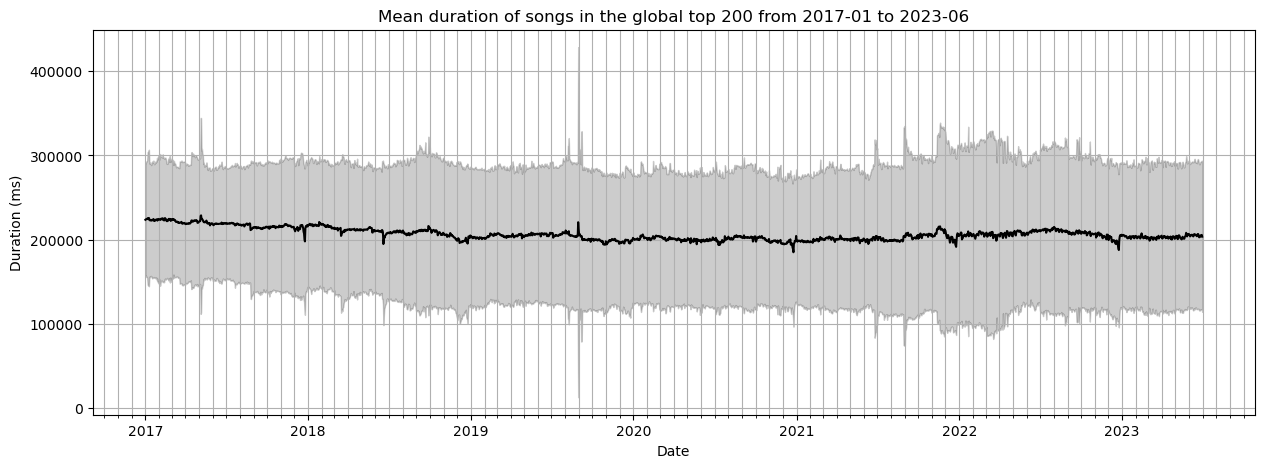

In [22]:
# plot the mean duration of songs in the global top 200 from 2017-01 to 2023-06
# make the mean visible together with a 95% confidence interval
# (i.e. mean +- 2*std)

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(global_data_by_date.index, global_data_by_date["mean"], color="black")
ax.fill_between(
    global_data_by_date.index,
    global_data_by_date["mean"] - 2 * global_data_by_date["std"],
    global_data_by_date["mean"] + 2 * global_data_by_date["std"],
    color="black",
    alpha=0.2,
)

ax.set_title("Mean duration of songs in the global top 200 from 2017-01 to 2023-06")
ax.set_ylabel("Duration (ms)")
ax.set_xlabel("Date")
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.grid(which="both")

# add a regression line
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(
    global_data_by_date.index.values.reshape(-1, 1),
    global_data_by_date["mean"].values.reshape(-1, 1),
)
ax.plot(
    global_data_by_date.index,
    reg.predict(global_data_by_date.index.values.reshape(-1, 1)),
    color="black",
    linestyle="--",
)

plt.show()

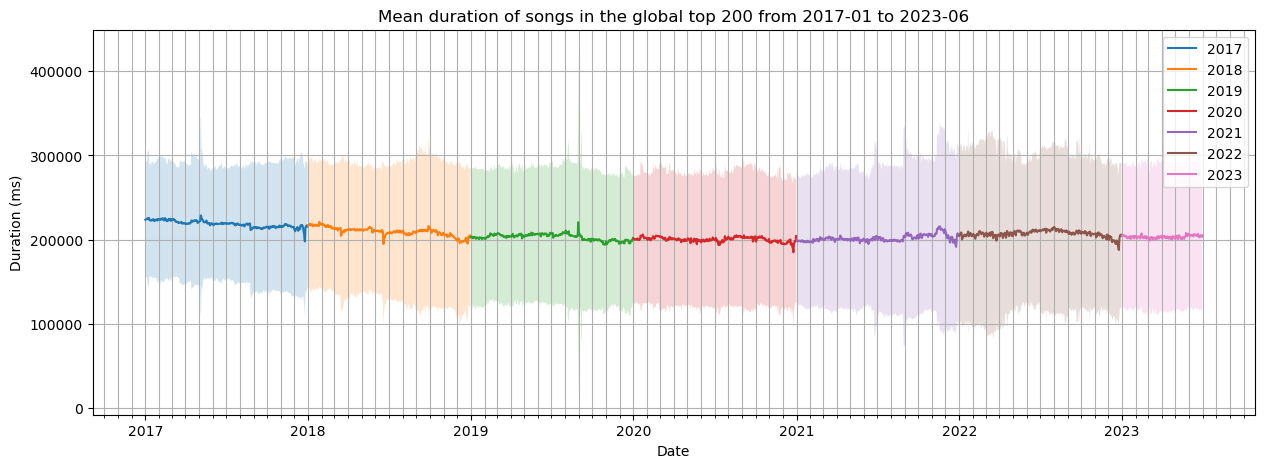

In [29]:
# plot the mean duration of songs in the global top 200 from 2017-01 to 2023-06
# make the mean visible together with a 95% confidence interval
# (i.e. mean +- 2*std)
# group the plots by year

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

fig, ax = plt.subplots(figsize=(15, 5))

for year in range(2017, 2024):
    year_data = global_data_by_date.loc[
        (global_data_by_date.index >= pd.to_datetime(date(year, 1, 1)))
        & (global_data_by_date.index < pd.to_datetime(date(year + 1, 1, 1)))
    ]
    ax.plot(year_data.index, year_data["mean"], label=year)
    ax.fill_between(
        year_data.index,
        year_data["mean"] - 2 * year_data["std"],
        year_data["mean"] + 2 * year_data["std"],
        alpha=0.2,
    )

ax.set_title("Mean duration of songs in the global top 200 from 2017-01 to 2023-06")
ax.set_ylabel("Duration (ms)")
ax.set_xlabel("Date")
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.grid(which="both")
ax.legend()

plt.show()

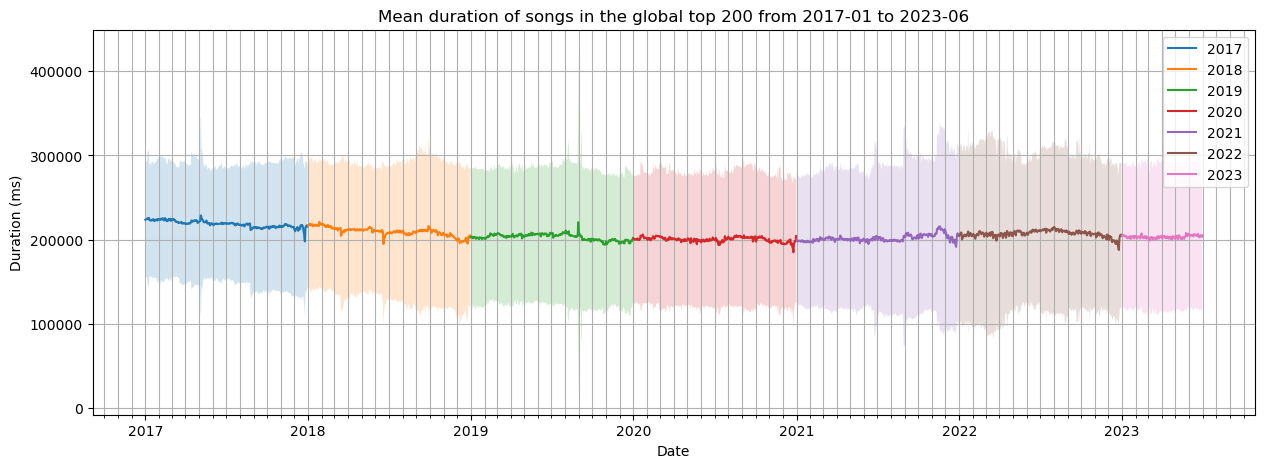

In [30]:
# plot the mean duration of songs in the global top 200 from 2017-01 to 2023-06
# make the mean visible together with a 95% confidence interval
# (i.e. mean +- 2*std)
# group the plots by year and plot them on top of each other

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as n